<a href="https://colab.research.google.com/github/ikrarmuhamad/credit-scoring/blob/main/Credit_Scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [319]:
!git clone 'https://github.com/ikrarmuhamad/credit-scoring'

fatal: destination path 'credit-scoring' already exists and is not an empty directory.


#Data Preprocessing

##Import Library and Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [159]:
pd.set_option('display.max_columns', None)

In [206]:
df = pd.read_csv('/content/drive/MyDrive/Data/loan_data_2007_2014.csv', low_memory = False)

##Data Understanding

In [207]:
df.shape

(466285, 75)

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [209]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [210]:
df.tail()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,MORTGAGE,110000.0,Source Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,773xx,TX,19.85,0.0,Apr-03,2.0,NaN,NaN,18.0,0.0,23208,77.6,36.0,w,12574.00,12574.00,10383.360000,10383.36,5826.00,4557.36,0.0,0.0,0.0,Jan-16,432.64,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,294998.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,D5,Chief of Interpretation (Park Ranger),10+ years,MORTGAGE,78000.0,Verified,Jan-14,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,377xx,TN,18.45,0.0,Jun-97,5.0,NaN,116.0,18.0,1.0,18238,46.3,30.0,f,0.00,0.00,4677.920000,4677.92,1837.04,2840.88,0.0,0.0,0.0,Dec-14,17.50,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,221830.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,D1,patrol,7 years,MORTGAGE,46000.0,Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/06/13 > I am going to c...,debt_consolidation,Debt consolidation,458xx,OH,25.65,0.0,Dec-01,2.0,65.0,NaN,18.0,0.0,6688,51.1,43.0,f,14428.31,14428.31,12343.980000,12343.98,6271.69,6072.29,0.0,0.0,0.0,Jan-16,514.34,Feb-16,Dec-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,73598.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,A4,Server Engineer Lead,3 years,OWN,83000.0,Verified,Jan-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,913xx,CA,5.39,3.0,Feb-03,1.0,13.0,NaN,21.0,0.0,11404,21.5,27.0,w,0.00,0.00,2126.579838,2126.58,2000.00,126.58,0.0,0.0,0.0,Dec-14,1500.68,NaN,Apr-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,591610.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN
466284,466284,9199665,11061576,10000,10000,9975.0,36 months,19.20,367.58,D,D3,NaN,10+ years,MORTGAGE,46000.0,Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/04/13 > I will like a l...,other,Other,950xx,CA,22.78,1.0,Feb-00,0.0,9.0,NaN,6.0,0.0,11325,70.8,22.0,f,3984.38,3974.41,8821.620000,8799.57,6015.62,2806.00,0.0,0.0,0.0,Jan-16,367.58,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,57477.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16000.0,NaN,NaN,NaN


In [211]:
df.sample(5)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
313990,313990,26197913,28670946,35000,35000,35000.0,60 months,22.15,969.65,E,E5,Director,4 years,MORTGAGE,355000.0,Source Verified,Aug-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,other,Other,606xx,IL,11.36,0.0,Apr-99,1.0,78.0,NaN,19.0,0.0,25449,71.3,35.0,w,29039.86,29039.86,15514.400000,15514.40,5960.14,9554.26,0.0,0.0,0.0,Jan-16,969.65,Jan-16,Jan-16,0.0,78.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,768524.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35700.0,NaN,NaN,NaN
149279,149279,4294745,5466917,3000,3000,3000.0,36 months,10.16,97.03,B,B1,reeves boat rentals,1 year,MORTGAGE,65000.0,Not Verified,Apr-13,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,home_improvement,Home improvement,703xx,LA,19.31,0.0,Apr-96,0.0,NaN,NaN,11.0,0.0,16151,29.7,50.0,f,0.00,0.00,3224.569052,3224.57,3000.00,224.57,0.0,0.0,0.0,Feb-14,2357.80,NaN,Mar-14,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,196997.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54290.0,NaN,NaN,NaN
312785,312785,26298840,28771729,16525,16525,16525.0,36 months,20.99,622.50,E,E4,RN,2 years,MORTGAGE,46000.0,Source Verified,Sep-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,450xx,OH,25.05,0.0,Sep-07,1.0,NaN,NaN,12.0,0.0,16770,58.8,15.0,f,10429.36,10429.36,9960.000000,9960.00,6095.64,3864.36,0.0,0.0,0.0,Jan-16,622.50,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,187084.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28500.0,NaN,NaN,NaN
221617,221617,1217653,1458439,5375,5375,5375.0,36 months,6.03,163.60,A,A1,QTC Management,1 year,MORTGAGE,37000.0,Source Verified,Apr-12,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 04/01/12 > I plan to use t...,debt_consolidation,Sunrise,924xx,CA,16.83,0.0,Apr-96,0.0,NaN,NaN,11.0,0.0,15498,57.4,28.0,f,0.00,0.00,5232.560000,5232.56,4726.76,505.80,0.0,0.0,0.0,Dec-14,163.60,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
322579,322579,24785690,27228612,15000,15000,15000.0,60 months,14.49,352.85,C,C4,Revenue Tax Specialist,2 years,MORTGAGE,44448.0,Not Verified,Aug-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,626xx,IL,20.03,0.0,Dec-99,0.0,NaN,66.0,13.0,1.0,1175,26.1,53.0,w,11780.90,11780.90,5998.450000,5998.45,3219.10,2779.35,0.0,0.0,0.0,Jan-16,352.85,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,142292.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4500.0,NaN,NaN,NaN


In [212]:
#Statistical features
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466285.0,0.0,0.0,0.0,466256.000000,3.960090e+05,3.960090e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,42.852547,1.0,NaN,NaN,NaN,0.004002,1.919135e+02,1.388017e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,21.662591,0.0,NaN,NaN,NaN,0.068637,1.463021e+04,1.521147e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,26.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.861800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,42.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,8.153900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,59.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.089530e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

##Check duplicated data

In [213]:
# check duplicated data
df.duplicated().sum()

0

has no duplicate data

##Drop unimportant data

In [214]:
# Drop a column that has only one value, because it is meaningless
drop = df.nunique()[(df.nunique() == 1)].keys().tolist()

# Drop the column whose value is equal to the length of the row, because it means nothing
# just random data and unimportant
drop2 = df.nunique()[(df.nunique() == df.shape[0])].keys().tolist()

In [215]:
df.drop(drop + drop2, axis = 1, inplace = True)

##Features engineering

####Target label

In [216]:
df['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

`df['loan_status']` is our target variable, there are a few value variable that can we change according to our target whether `bad` and `good`

In [217]:
bad = ['Charged Off','Default', 'Does not meet the credit policy. Status:Charged Off','Late (31-120 days)']
df['bad_flag'] = np.where(df['loan_status'].isin(bad), 1, 0)
df.drop('loan_status', axis = 1, inplace = True)

In [218]:
df.rename(columns = {'bad_flag' : 'loan_status'}, inplace = True)

In [219]:
df['loan_status'].value_counts()

0    415317
1     50968
Name: loan_status, dtype: int64

####emp_length

In [220]:
df['emp_length'] = df['emp_length'].str.replace('\+ years', '')
df['emp_length'] = df['emp_length'].str.replace('< 1 year', str(0))
df['emp_length'] = df['emp_length'].str.replace(' years', '')
df['emp_length'] = df['emp_length'].str.replace(' year', '')

<ipython-input-220-6e3d9253d026>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['emp_length'] = df['emp_length'].str.replace('\+ years', '')


In [221]:
df['emp_length'] = df['emp_length'].astype(float)

####term

In [222]:
df['term'] = df['term'].str.replace(' months', '')

In [223]:
df['term'] = df['term'].astype(int)

####earliest_cr_line_date

In [224]:
df['earliest_cr_line_date'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df['earliest_cr_line_date'].head(3)

0   1985-01-01
1   1999-04-01
2   2001-11-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [225]:
df['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
df['mths_since_earliest_cr_line'].head(3)

0    395.0
1    224.0
2    193.0
Name: mths_since_earliest_cr_line, dtype: float64

In [226]:
df[df['mths_since_earliest_cr_line']<0][['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']].head(3)

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0


In [227]:
df.loc[df['mths_since_earliest_cr_line']<0, 'mths_since_earliest_cr_line'] = df['mths_since_earliest_cr_line'].max()

In [228]:
df.drop(['earliest_cr_line', 'earliest_cr_line_date'], axis=1, inplace=True)

In [229]:
df['mths_since_earliest_cr_line'].max()

587.0

####issue_d

In [230]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format = '%b-%y')
df['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-02') - df['issue_d']) / np.timedelta64(1, 'M')))

In [231]:
df['mths_since_issue_d'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

In [232]:
df.drop(['issue_d'], axis=1, inplace=True)

####last_pymnt_d

In [233]:
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format = '%b-%y')
df['mths_since_last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['last_pymnt_d']) / np.timedelta64(1, 'M')))

In [234]:
df['mths_since_last_pymnt_d'].describe()

count    465909.000000
mean         31.294369
std          12.809898
min          23.000000
25%          23.000000
50%          24.000000
75%          35.000000
max         120.000000
Name: mths_since_last_pymnt_d, dtype: float64

In [235]:
df.drop('last_pymnt_d', axis = 1, inplace = True)

####next_pymnt_d

In [236]:
df['next_pymnt_d'] = pd.to_datetime(df['next_pymnt_d'], format = '%b-%y')
df['mths_since_next_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['next_pymnt_d']) / np.timedelta64(1, 'M')))

In [237]:
df['mths_since_next_pymnt_d'].describe()

count    239071.000000
mean         22.738136
std           6.082298
min          21.000000
25%          22.000000
50%          22.000000
75%          22.000000
max         120.000000
Name: mths_since_next_pymnt_d, dtype: float64

In [238]:
df.drop('next_pymnt_d', axis = 1, inplace = True)

####last_credit_pull_d

In [239]:
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format = '%b-%y')
df['mths_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['last_credit_pull_d']) / np.timedelta64(1, 'M')))

In [240]:
df['mths_since_last_credit_pull_d'].describe()

count    466243.000000
mean         27.045588
std           9.636423
min          23.000000
25%          23.000000
50%          23.000000
75%          25.000000
max         127.000000
Name: mths_since_last_credit_pull_d, dtype: float64

In [241]:
df.drop('last_credit_pull_d', axis = 1, inplace = True)

##Check missing value

In [242]:
# Because the data have a 75 feature
# So to see all the nan value in percentage in each features, we must separate them with head
# and tail
df.isnull().sum().head(40)*100/len(df)

loan_amnt                   0.000000
funded_amnt                 0.000000
funded_amnt_inv             0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_title                   5.916553
emp_length                  4.505399
home_ownership              0.000000
annual_inc                  0.000858
verification_status         0.000000
pymnt_plan                  0.000000
desc                       72.981546
purpose                     0.000000
title                       0.004289
zip_code                    0.000000
addr_state                  0.000000
dti                         0.000000
delinq_2yrs                 0.006219
inq_last_6mths              0.006219
mths_since_last_delinq     53.690554
mths_since_last_record     86.566585
open_acc                    0.006219
pub_rec                     0.006219
revol_bal                   0.000000
r

In [243]:
df.isnull().sum().tail(35)*100/len(df)

total_rec_prncp                    0.000000
total_rec_int                      0.000000
total_rec_late_fee                 0.000000
recoveries                         0.000000
collection_recovery_fee            0.000000
last_pymnt_amnt                    0.000000
collections_12_mths_ex_med         0.031097
mths_since_last_major_derog       78.773926
annual_inc_joint                 100.000000
dti_joint                        100.000000
verification_status_joint        100.000000
acc_now_delinq                     0.006219
tot_coll_amt                      15.071469
tot_cur_bal                       15.071469
open_acc_6m                      100.000000
open_il_6m                       100.000000
open_il_12m                      100.000000
open_il_24m                      100.000000
mths_since_rcnt_il               100.000000
total_bal_il                     100.000000
il_util                          100.000000
open_rv_12m                      100.000000
open_rv_24m                     

###Handling missing value

In [244]:
# any feature that has a missing value of more than 70% will drop
# so we must separate them
droped = df.columns[(df.isnull().sum()*100/len(df) > 80)].tolist()

#unimportant features
unimportant = ['emp_title', 'title', 'zip_code', 'sub_grade']

In [245]:
# drop the feature
df.drop(droped + unimportant, axis = 1, inplace = True)

In [246]:
df.isnull().sum()*100/len(df)

loan_amnt                         0.000000
funded_amnt                       0.000000
funded_amnt_inv                   0.000000
term                              0.000000
int_rate                          0.000000
installment                       0.000000
grade                             0.000000
emp_length                        4.505399
home_ownership                    0.000000
annual_inc                        0.000858
verification_status               0.000000
pymnt_plan                        0.000000
desc                             72.981546
purpose                           0.000000
addr_state                        0.000000
dti                               0.000000
delinq_2yrs                       0.006219
inq_last_6mths                    0.006219
mths_since_last_delinq           53.690554
open_acc                          0.006219
pub_rec                           0.006219
revol_bal                         0.000000
revol_util                        0.072917
total_acc  

In [247]:
nan = df.isnull().sum()*100/len(df)

In [248]:
info = pd.DataFrame({
    'columns' : df.columns.tolist(),
    'dtypes' : df.dtypes.values.tolist(),
    'nunique' : df.nunique().values.tolist(),
    '% missing' : nan.values.tolist()
})

In [249]:
df['home_ownership'].value_counts()

MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          182
NONE            50
ANY              1
Name: home_ownership, dtype: int64

In [250]:
df['purpose'].value_counts()

debt_consolidation    274195
credit_card           104157
home_improvement       26537
other                  23690
major_purchase          9828
small_business          7013
car                     5397
medical                 4602
moving                  2994
vacation                2487
wedding                 2343
house                   2269
educational              422
renewable_energy         351
Name: purpose, dtype: int64

In [251]:
info

,columns,dtypes,nunique,% missing
0,loan_amnt,int64,1352,0.000000
1,funded_amnt,int64,1354,0.000000
2,funded_amnt_inv,float64,9854,0.000000
3,term,int64,2,0.000000
4,int_rate,float64,506,0.000000
5,installment,float64,55622,0.000000
6,grade,object,7,0.000000
7,emp_length,float64,11,4.505399
8,home_ownership,object,6,0.000000
9,annual_inc,float64,31901,0.000858


In [252]:
df.drop(['desc'], axis = 1, inplace = True)

In [253]:
#check every columns that have missing value to identify treatment handling missing value
missing = df.columns[(df.isnull().sum()*100/len(df) > 0)].tolist()
for i in missing :
  print(f'====={i}=======')
  display(df[i].value_counts().head())
  display(df[i].dtypes)

=====emp_length=======


10.0    150049
2.0      41373
3.0      36596
0.0      36265
5.0      30774
Name: emp_length, dtype: int64

dtype('float64')

=====annual_inc=======


60000.0    17980
50000.0    15949
65000.0    13211
40000.0    12864
70000.0    12436
Name: annual_inc, dtype: int64

dtype('float64')

=====delinq_2yrs=======


0.0    382954
1.0     56224
2.0     16310
3.0      5684
4.0      2378
Name: delinq_2yrs, dtype: int64

dtype('float64')

=====inq_last_6mths=======


0.0    241498
1.0    130148
2.0     57825
3.0     25126
4.0      7241
Name: inq_last_6mths, dtype: int64

dtype('float64')

=====mths_since_last_delinq=======


9.0     4358
8.0     4272
13.0    4260
12.0    4193
10.0    4146
Name: mths_since_last_delinq, dtype: int64

dtype('float64')

=====open_acc=======


9.0     44019
10.0    42512
8.0     41893
11.0    39112
7.0     37602
Name: open_acc, dtype: int64

dtype('float64')

=====pub_rec=======


0.0    404893
1.0     53051
2.0      5624
3.0      1611
4.0       520
Name: pub_rec, dtype: int64

dtype('float64')

=====revol_util=======


0.0     2284
58.0     864
53.0     850
59.0     845
61.0     832
Name: revol_util, dtype: int64

dtype('float64')

=====total_acc=======


21.0    17087
20.0    17073
22.0    17028
23.0    16719
19.0    16709
Name: total_acc, dtype: int64

dtype('float64')

=====collections_12_mths_ex_med=======


0.0    462226
1.0      3665
2.0       219
3.0        19
4.0         7
Name: collections_12_mths_ex_med, dtype: int64

dtype('float64')

=====mths_since_last_major_derog=======


45.0    1672
46.0    1670
42.0    1656
48.0    1637
41.0    1592
Name: mths_since_last_major_derog, dtype: int64

dtype('float64')

=====acc_now_delinq=======


0.0    464524
1.0      1623
2.0        92
3.0        11
4.0         4
Name: acc_now_delinq, dtype: int64

dtype('float64')

=====tot_coll_amt=======


0.0      346259
50.0        837
100.0       650
75.0        515
60.0        309
Name: tot_coll_amt, dtype: int64

dtype('float64')

=====tot_cur_bal=======


0.0        78
14186.0    15
23254.0    15
28674.0    14
30491.0    14
Name: tot_cur_bal, dtype: int64

dtype('float64')

=====total_rev_hi_lim=======


15000.0    1392
13500.0    1324
10000.0    1316
12000.0    1301
12500.0    1294
Name: total_rev_hi_lim, dtype: int64

dtype('float64')

=====mths_since_earliest_cr_line=======


206.0    3674
208.0    3597
196.0    3455
218.0    3406
194.0    3329
Name: mths_since_earliest_cr_line, dtype: int64

dtype('float64')

=====mths_since_last_pymnt_d=======


23.0    179620
24.0     62000
29.0     11703
26.0     11248
27.0     10204
Name: mths_since_last_pymnt_d, dtype: int64

dtype('float64')

=====mths_since_next_pymnt_d=======


22.0    208393
23.0     27922
81.0       107
80.0       101
82.0        91
Name: mths_since_next_pymnt_d, dtype: int64

dtype('float64')

=====mths_since_last_credit_pull_d=======


23.0    327699
24.0     13992
25.0      8384
27.0      8051
26.0      7957
Name: mths_since_last_credit_pull_d, dtype: int64

dtype('float64')

In [254]:
num = df.columns[df.dtypes != object].tolist()
cat = [x for x in df.columns if x not in num]


In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 46 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   loan_amnt                      466285 non-null  int64  
 1   funded_amnt                    466285 non-null  int64  
 2   funded_amnt_inv                466285 non-null  float64
 3   term                           466285 non-null  int64  
 4   int_rate                       466285 non-null  float64
 5   installment                    466285 non-null  float64
 6   grade                          466285 non-null  object 
 7   emp_length                     445277 non-null  float64
 8   home_ownership                 466285 non-null  object 
 9   annual_inc                     466281 non-null  float64
 10  verification_status            466285 non-null  object 
 11  pymnt_plan                     466285 non-null  object 
 12  purpose                       

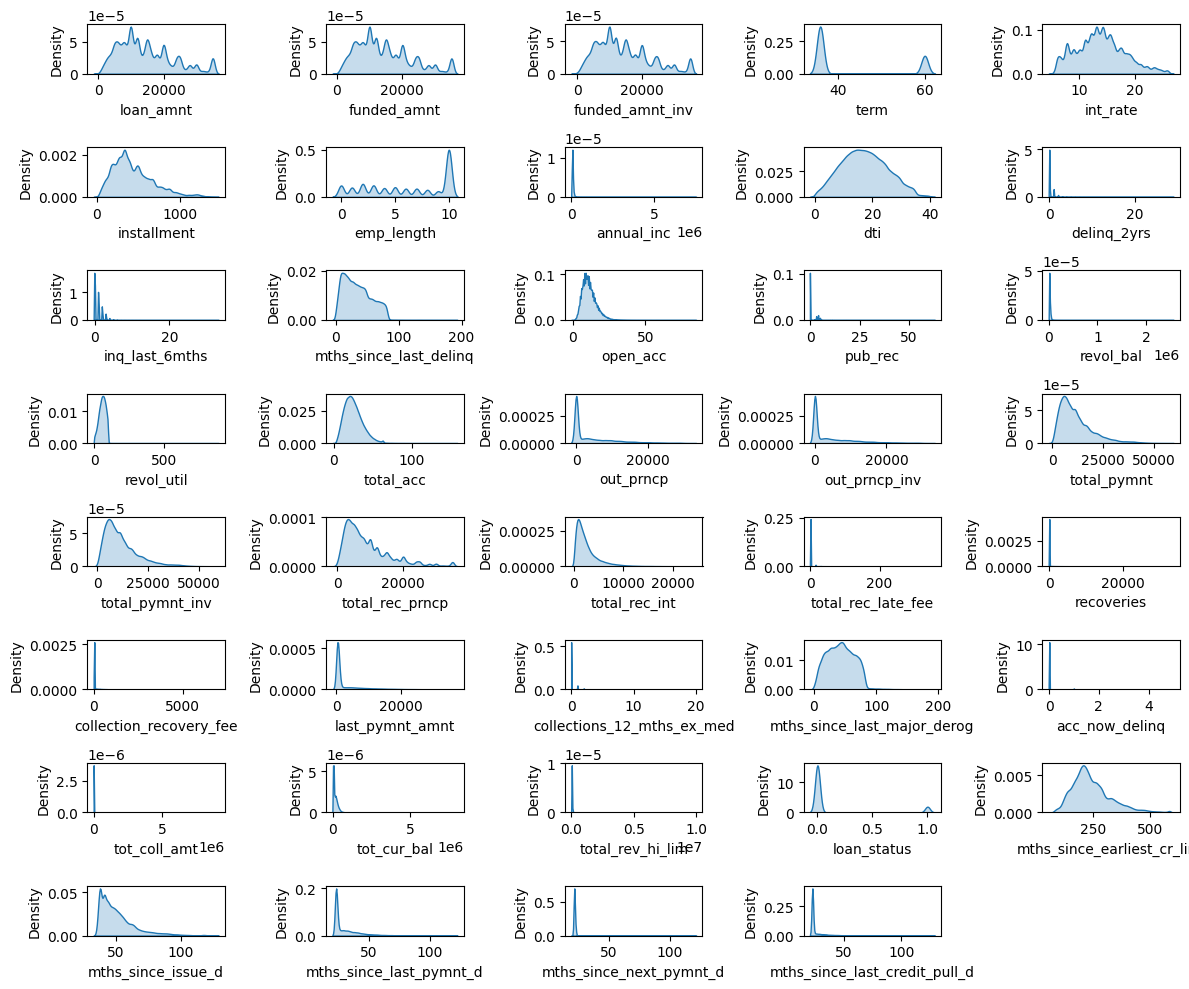

In [256]:
plt.figure(figsize = (12, 10))
for i in range(len(num)):
  plt.subplot(8, 5, i+1)
  sns.kdeplot(df[num[i]], fill = True)
  plt.tight_layout()

In [257]:
df[num].isnull().sum()*100/len(df)

loan_amnt                         0.000000
funded_amnt                       0.000000
funded_amnt_inv                   0.000000
term                              0.000000
int_rate                          0.000000
installment                       0.000000
emp_length                        4.505399
annual_inc                        0.000858
dti                               0.000000
delinq_2yrs                       0.006219
inq_last_6mths                    0.006219
mths_since_last_delinq           53.690554
open_acc                          0.006219
pub_rec                           0.006219
revol_bal                         0.000000
revol_util                        0.072917
total_acc                         0.006219
out_prncp                         0.000000
out_prncp_inv                     0.000000
total_pymnt                       0.000000
total_pymnt_inv                   0.000000
total_rec_prncp                   0.000000
total_rec_int                     0.000000
total_rec_l

<ipython-input-258-4ce72a894dc1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

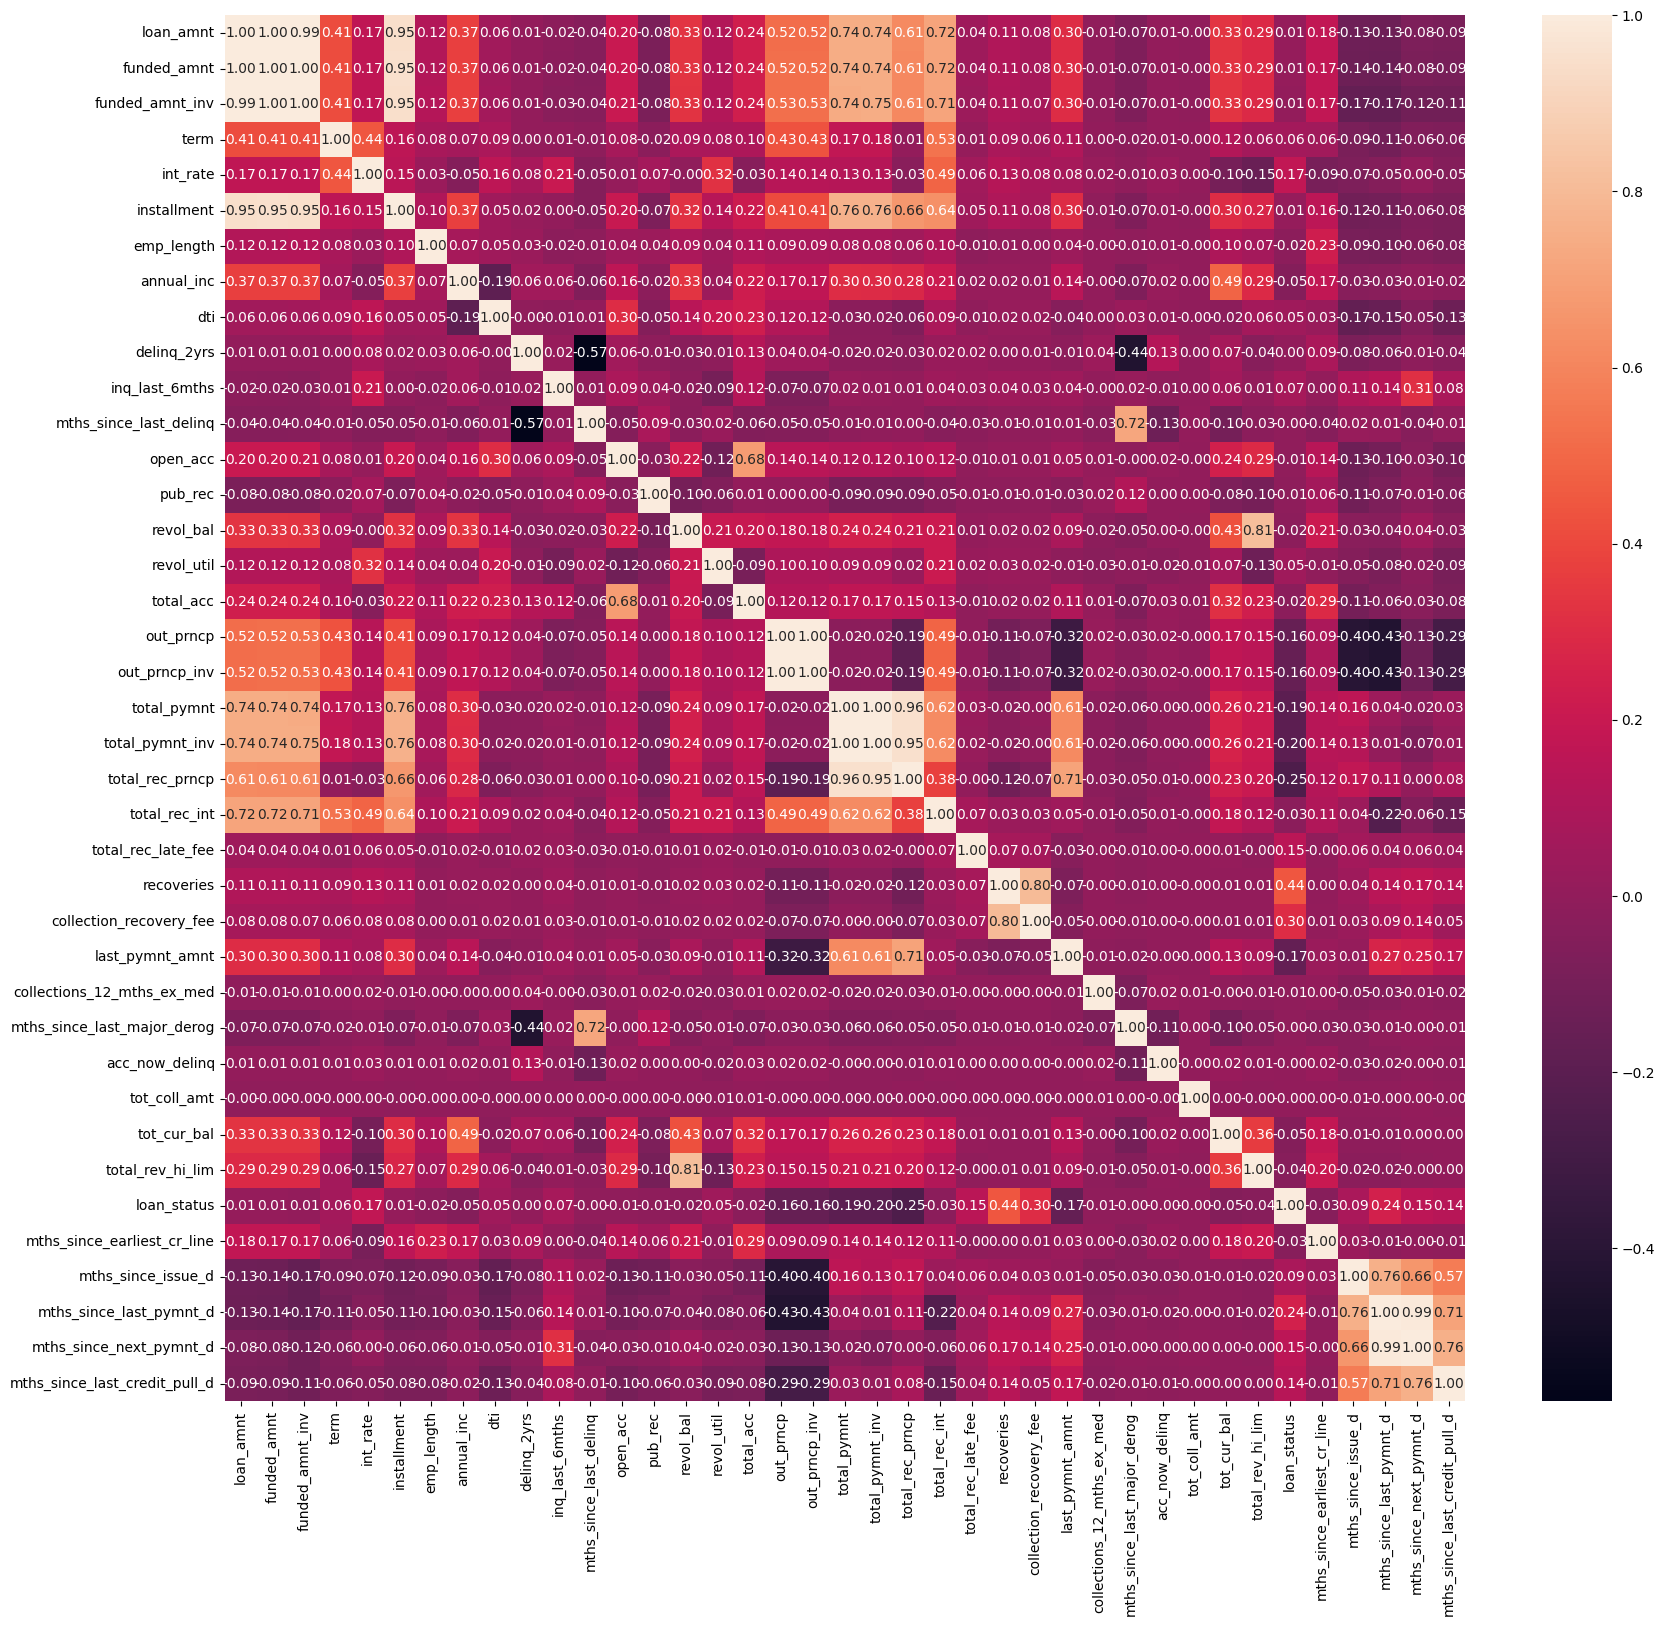

In [258]:
corr = df.corr()
plt.figure(figsize = (20, 18))
sns.heatmap(corr, annot = True, annot_kws = {'size' : 10}, fmt = '.2f')

After check the correlation for each features, we can drop one of features that have highly correlation to reduce `multicolinearity`

In [259]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)] # Set threshold for correlation more than 0.7
df.drop(to_drop_hicorr, axis = 1, inplace = True)

<ipython-input-259-a4496a7ffb84>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().abs()
<ipython-input-259-a4496a7ffb84>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [260]:
df.isnull().sum()*100/len(df)

loan_amnt                       0.000000
term                            0.000000
int_rate                        0.000000
grade                           0.000000
emp_length                      4.505399
home_ownership                  0.000000
annual_inc                      0.000858
verification_status             0.000000
pymnt_plan                      0.000000
purpose                         0.000000
addr_state                      0.000000
dti                             0.000000
delinq_2yrs                     0.006219
inq_last_6mths                  0.006219
mths_since_last_delinq         53.690554
open_acc                        0.006219
pub_rec                         0.006219
revol_bal                       0.000000
revol_util                      0.072917
total_acc                       0.006219
initial_list_status             0.000000
out_prncp                       0.000000
total_rec_late_fee              0.000000
recoveries                      0.000000
collections_12_m

In [261]:
df['mths_since_last_delinq'].fillna(0, inplace = True)
df['tot_coll_amt'].fillna(0, inplace = True)
df['tot_cur_bal'].fillna(df['tot_cur_bal'].median(), inplace = True)

In [262]:
df.dropna(inplace = True)

In [263]:
df.isnull().sum()

loan_amnt                      0
term                           0
int_rate                       0
grade                          0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
pymnt_plan                     0
purpose                        0
addr_state                     0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
mths_since_last_delinq         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
initial_list_status            0
out_prncp                      0
total_rec_late_fee             0
recoveries                     0
collections_12_mths_ex_med     0
acc_now_delinq                 0
tot_coll_amt                   0
tot_cur_bal                    0
loan_status                    0
mths_since_earliest_cr_line    0
mths_since

In [264]:
df.duplicated().sum()

0

##Check inconsistent data

In [265]:
# to check the dtypes in each columns, let's check every 5 value counts in each columns
# so we will see every 5 value for each columns and then match with the dtypes


for i in df.columns:
  print(f'========={i}=======')
  display(df[i].value_counts().head())
  display(df[i].dtypes)

=========loan_amnt=======


10000    31405
12000    24662
15000    22628
20000    22097
35000    16246
Name: loan_amnt, dtype: int64

dtype('int64')

=========term=======


36    320396
60    124440
Name: term, dtype: int64

dtype('int64')

=========int_rate=======


12.99    15010
10.99    14101
15.61    12417
8.90     10983
16.29    10098
Name: int_rate, dtype: int64

dtype('float64')

=========grade=======


B    130719
C    119364
D     73101
A     71730
E     34079
Name: grade, dtype: int64

dtype('O')

=========emp_length=======


10.0    149943
2.0      41333
3.0      36564
0.0      36176
5.0      30753
Name: emp_length, dtype: int64

dtype('float64')

=========home_ownership=======


MORTGAGE    225809
RENT        180834
OWN          37972
OTHER          177
NONE            43
Name: home_ownership, dtype: int64

dtype('O')

=========annual_inc=======


60000.0    17349
50000.0    15328
65000.0    12868
40000.0    12337
70000.0    12086
Name: annual_inc, dtype: int64

dtype('float64')

=========verification_status=======


Verified           152128
Not Verified       147045
Source Verified    145663
Name: verification_status, dtype: int64

dtype('O')

=========pymnt_plan=======


n    444827
y         9
Name: pymnt_plan, dtype: int64

dtype('O')

=========purpose=======


debt_consolidation    262695
credit_card            98902
home_improvement       24971
other                  22235
major_purchase          9364
Name: purpose, dtype: int64

dtype('O')

=========addr_state=======


CA    68518
NY    38357
TX    35151
FL    29821
IL    17843
Name: addr_state, dtype: int64

dtype('O')

=========dti=======


14.4    384
19.2    371
13.2    351
18.0    349
12.0    347
Name: dti, dtype: int64

dtype('float64')

=========delinq_2yrs=======


0.0    364900
1.0     53917
2.0     15669
3.0      5484
4.0      2281
Name: delinq_2yrs, dtype: int64

dtype('float64')

=========inq_last_6mths=======


0.0    230053
1.0    124249
2.0     55321
3.0     24070
4.0      6899
Name: inq_last_6mths, dtype: int64

dtype('float64')

=========mths_since_last_delinq=======


0.0     239923
9.0       4211
13.0      4103
8.0       4101
12.0      4011
Name: mths_since_last_delinq, dtype: int64

dtype('float64')

=========open_acc=======


9.0     41915
10.0    40529
8.0     39752
11.0    37445
7.0     35504
Name: open_acc, dtype: int64

dtype('float64')

=========pub_rec=======


0.0    388505
1.0     48710
2.0      5167
3.0      1467
4.0       472
Name: pub_rec, dtype: int64

dtype('float64')

=========revol_bal=======


0       1903
5896      39
7429      38
6052      38
5235      38
Name: revol_bal, dtype: int64

dtype('int64')

=========revol_util=======


0.0     2181
58.0     822
53.0     809
59.0     803
61.0     790
Name: revol_util, dtype: int64

dtype('float64')

=========total_acc=======


20.0    16303
21.0    16244
22.0    16236
23.0    15975
19.0    15943
Name: total_acc, dtype: int64

dtype('float64')

=========initial_list_status=======


f    289242
w    155594
Name: initial_list_status, dtype: int64

dtype('O')

=========out_prncp=======


0.00       220958
6563.61        76
6110.65        72
5684.61        70
5131.53        69
Name: out_prncp, dtype: int64

dtype('float64')

=========total_rec_late_fee=======


0.00     434605
15.00      2076
30.00       272
45.00        46
16.84        15
Name: total_rec_late_fee, dtype: int64

dtype('float64')

=========recoveries=======


0.00      421581
14.28          9
10.00          9
11.70          9
200.00         8
Name: recoveries, dtype: int64

dtype('float64')

=========collections_12_mths_ex_med=======


0.0    441132
1.0      3470
2.0       206
3.0        18
4.0         7
Name: collections_12_mths_ex_med, dtype: int64

dtype('float64')

=========acc_now_delinq=======


0.0    443180
1.0      1552
2.0        87
3.0        11
4.0         4
Name: acc_now_delinq, dtype: int64

dtype('float64')

=========tot_coll_amt=======


0.0      397722
50.0        800
100.0       621
75.0        490
60.0        294
Name: tot_coll_amt, dtype: int64

dtype('float64')

=========tot_cur_bal=======


81539.0    67987
0.0           56
14186.0       15
30491.0       14
13818.0       13
Name: tot_cur_bal, dtype: int64

dtype('float64')

=========loan_status=======


0    396731
1     48105
Name: loan_status, dtype: int64

dtype('int64')

=========mths_since_earliest_cr_line=======


206.0    3559
208.0    3483
196.0    3346
218.0    3317
194.0    3228
Name: mths_since_earliest_cr_line, dtype: int64

dtype('float64')

=========mths_since_issue_d=======


38.0    36701
41.0    28084
37.0    23643
43.0    18197
44.0    18050
Name: mths_since_issue_d, dtype: int64

dtype('float64')

#Exploratory Data Analysis

##Outlier Check

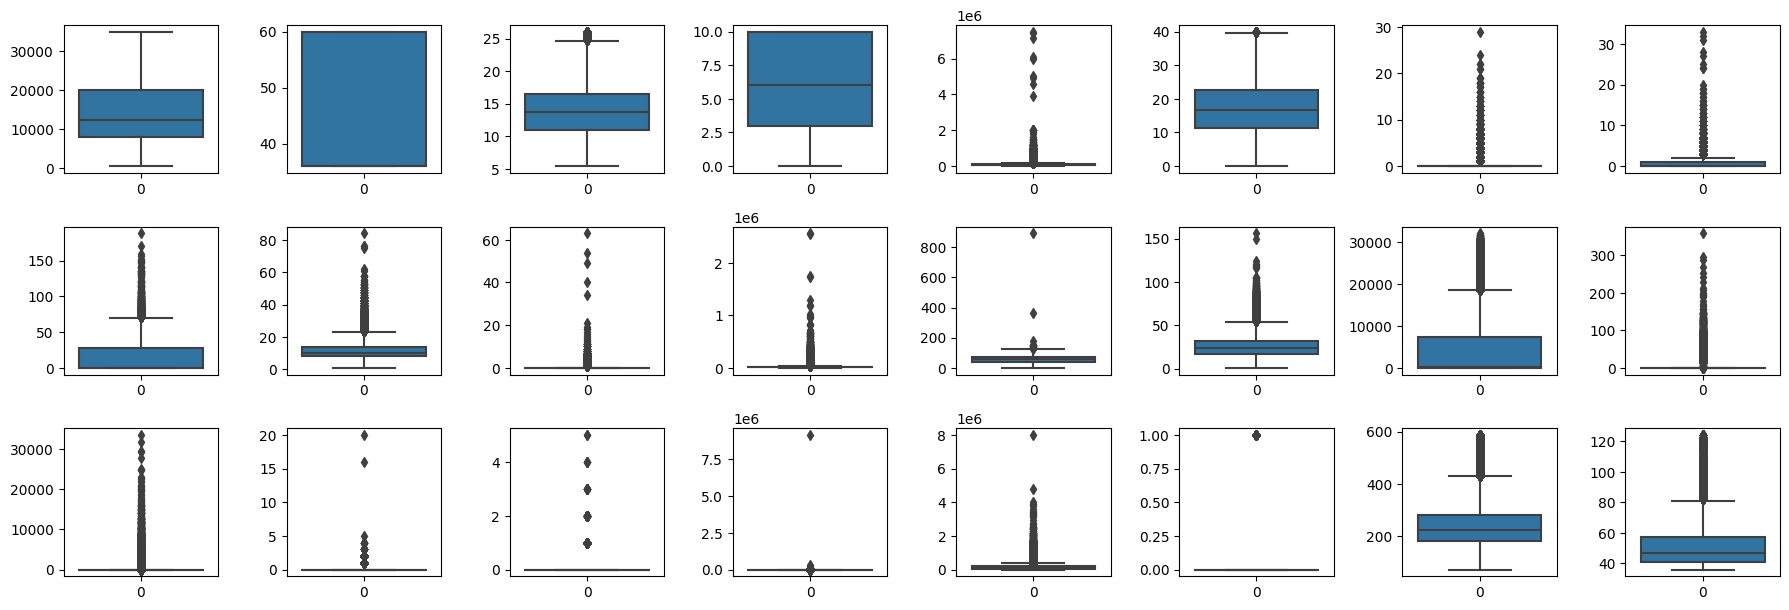

In [270]:
#Check outlier data using boxplot
#Separate between numerical and categorical columns

num = df.columns[(df.dtypes != 'object')].tolist()
cat = [x for x in df.columns if x not in num]
plt.figure(figsize = (18,10))
for i in range(len(num)):
  plt.subplot(5, 8, i+1)
  sns.boxplot(df[num[i]])
  plt.tight_layout()

In [271]:
#To see every outlier data in each column, create a function that can display the data is the outlier

def outlier(data):
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3 - Q1
  upper = Q3 + (1.5*IQR)
  lower = Q1 - (1.5*IQR)
  num_upper = len(data[(data > upper)])
  num_lower = len(data[(data < lower)])
  if num_upper > 0 and num_lower > 0 :
    print('Upper Bound :')
    display(data[(data > upper)].head().reset_index())
    print('Lower Bound :')
    display(data[(data < lower)].head().reset_index())
  elif num_upper > 0 and num_lower == 0 :
    print('Upper Bound :')
    display(data[(data > upper)].head().reset_index())
  elif num_upper == 0 and num_lower > 0 :
    print('Lower Bound :')
    display(data[(data < lower)].head().reset_index())
  else :
    print('Has no Outlier')

In [272]:
#using numerical columns, check every outlier data in each numerical columns

for i in num:
  print(f"======={i}=======")
  outlier(df[i])

=======loan_amnt=======
Has no Outlier
=======term=======
Has no Outlier
=======int_rate=======
Upper Bound :


,index,int_rate
0,42655,25.89
1,42739,25.80
2,42783,24.99
3,42800,25.57
4,42853,26.06


=======emp_length=======
Has no Outlier
=======annual_inc=======
Upper Bound :


,index,annual_inc
0,170,225000.0
1,185,168000.0
2,333,175000.0
3,336,208000.0
4,392,276000.0


=======dti=======
Upper Bound :


,index,dti
0,231228,39.77
1,232569,39.89
2,232725,39.86
3,232830,39.92
4,233364,39.95


=======delinq_2yrs=======
Upper Bound :


,index,delinq_2yrs
0,18,2.0
1,27,3.0
2,28,1.0
3,93,1.0
4,99,1.0


=======inq_last_6mths=======
Upper Bound :


,index,inq_last_6mths
0,1,5.0
1,5,3.0
2,20,3.0
3,39,3.0
4,56,3.0


=======mths_since_last_delinq=======
Upper Bound :


,index,mths_since_last_delinq
0,76,74.0
1,114,77.0
2,117,74.0
3,123,74.0
4,184,80.0


=======open_acc=======
Upper Bound :


,index,open_acc
0,250,30.0
1,602,27.0
2,918,34.0
3,1083,25.0
4,1510,30.0


=======pub_rec=======
Upper Bound :


,index,pub_rec
0,66,1.0
1,70,1.0
2,77,1.0
3,94,1.0
4,161,1.0


=======revol_bal=======
Upper Bound :


,index,revol_bal
0,42,43936
1,46,74351
2,74,63864
3,166,71890
4,226,45449


=======revol_util=======
Upper Bound :


,index,revol_util
0,92564,140.4
1,95278,128.1
2,238448,129.5
3,239425,134.3
4,268579,137.8


=======total_acc=======
Upper Bound :


,index,total_acc
0,219,61.0
1,250,56.0
2,336,79.0
3,403,62.0
4,736,56.0


=======out_prncp=======
Upper Bound :


,index,out_prncp
0,42547,19671.64
1,42562,22770.40
2,42572,21112.23
3,42579,20501.68
4,42604,25003.09


=======total_rec_late_fee=======
Upper Bound :


,index,total_rec_late_fee
0,3,16.970000
1,18,15.000000
2,50,24.170000
3,63,14.988835
4,64,1.000000


=======recoveries=======
Upper Bound :


,index,recoveries
0,1,117.08
1,8,189.06
2,9,269.29
3,12,444.30
4,14,645.10


=======collections_12_mths_ex_med=======
Upper Bound :


,index,collections_12_mths_ex_med
0,42567,1.0
1,42572,1.0
2,42613,1.0
3,42863,1.0
4,42876,1.0


=======acc_now_delinq=======
Upper Bound :


,index,acc_now_delinq
0,42410,1.0
1,42433,1.0
2,42720,1.0
3,43245,1.0
4,43819,2.0


=======tot_coll_amt=======
Upper Bound :


,index,tot_coll_amt
0,42538,15386.0
1,42539,1514.0
2,42544,154.0
3,42549,539.0
4,42551,92.0


=======tot_cur_bal=======
Upper Bound :


,index,tot_cur_bal
0,42546,799592.0
1,42569,508488.0
2,42612,421813.0
3,42618,485773.0
4,42621,667075.0


=======loan_status=======
Upper Bound :


,index,loan_status
0,1,1
1,8,1
2,9,1
3,12,1
4,14,1


=======mths_since_earliest_cr_line=======
Upper Bound :


,index,mths_since_earliest_cr_line
0,31,433.0
1,169,452.0
2,217,528.0
3,226,458.0
4,232,438.0


=======mths_since_issue_d=======
Upper Bound :


,index,mths_since_issue_d
0,18935,82.0
1,18961,82.0
2,18963,82.0
3,18965,82.0
4,18966,82.0


The outlier seem like a normal data

##Distribution Check

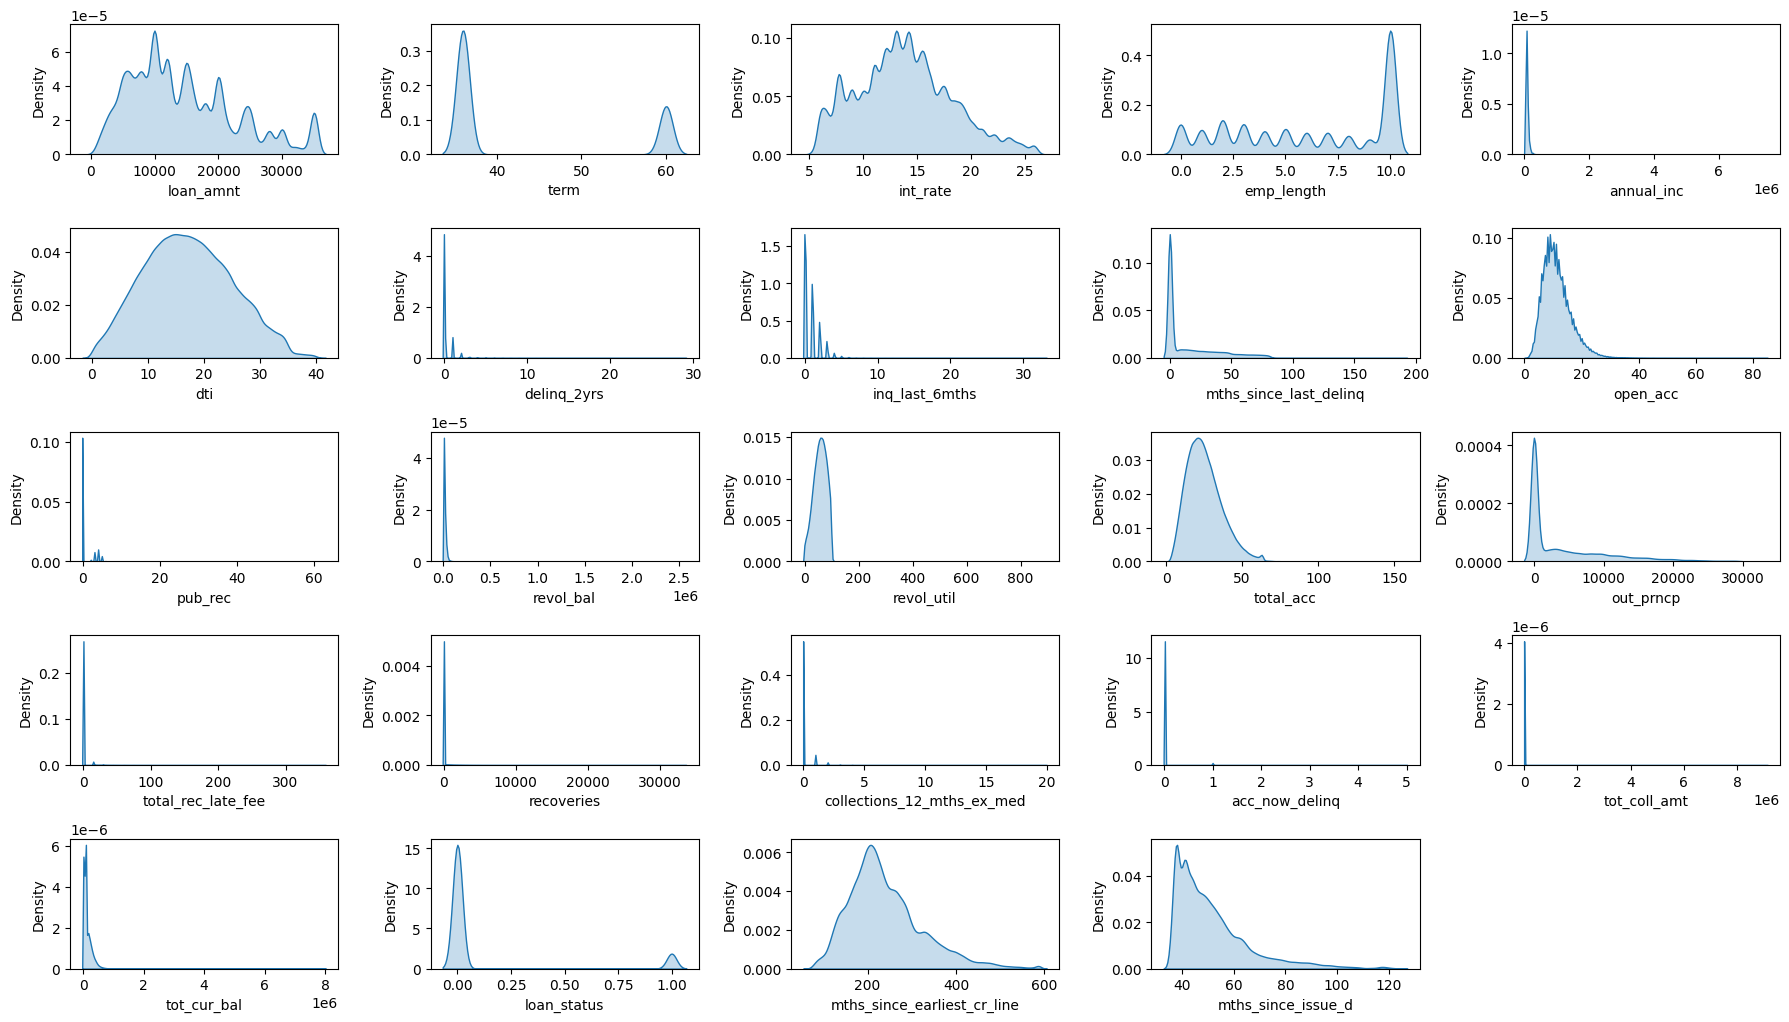

In [273]:
#Check distribution of numerical columns

plt.figure(figsize = (18, 16))
for i in range(len(num)):
  plt.subplot(8, 5, i+1)
  sns.kdeplot(df[num[i]], fill = True)
  plt.tight_layout()

mostly the data are positively skewed, but dti have a normal distribution

##Correlation

<ipython-input-275-ffd9794dc8f2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

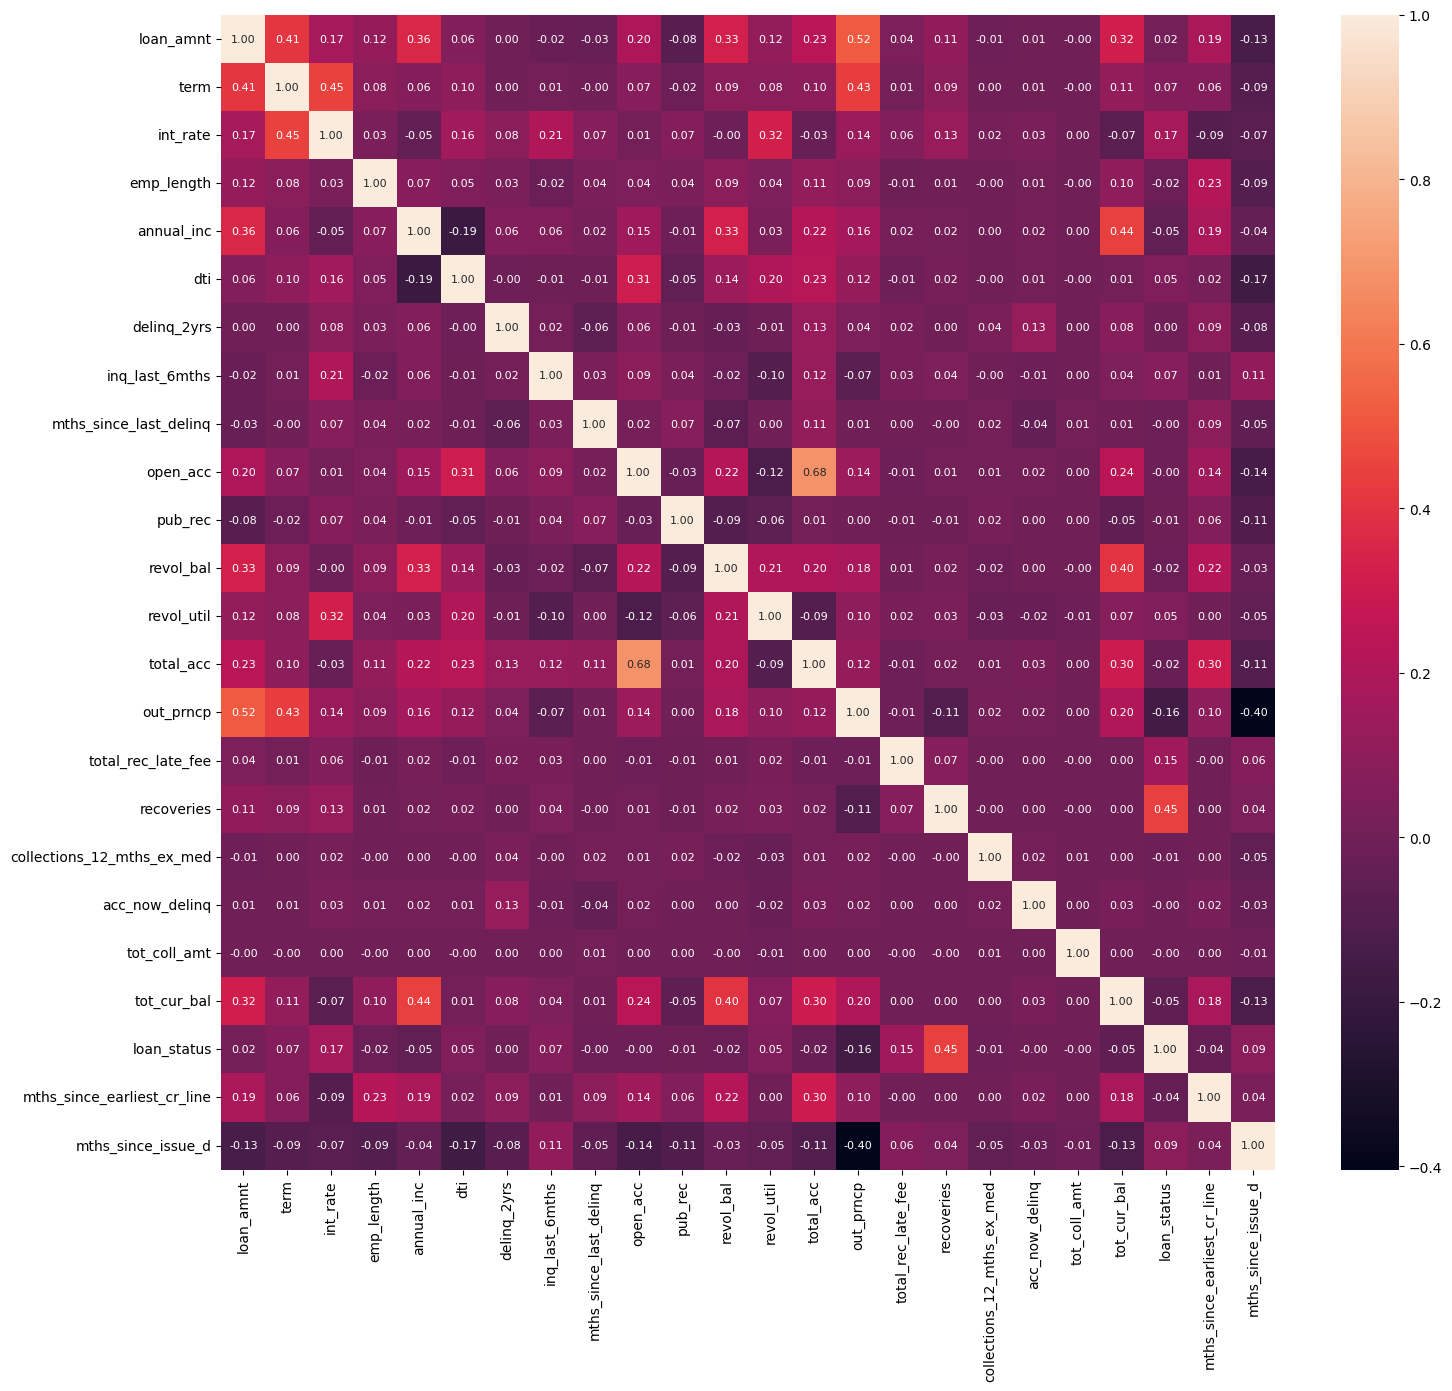

In [275]:
# Checkpoint correlation
corr = df.corr()
plt.figure(figsize = (17, 15))
sns.heatmap(corr, annot = True, annot_kws = {'size':8} ,fmt = '.2f')

#Encoding Variabel

For encoding variabel, separate the categorical data that have more than 2 unique value and the column that have just 2 unique value. Because, the columns that have just 2 unique value we will encoding columns with label encoder. And the columns that have more than 2 unique value, we will encoding them with dummies

In [276]:
df.shape

(444836, 31)

In [277]:
#Separate categorical and numerical columns
num = df.columns[(df.dtypes != 'object') & (df.columns != 'loan_status')].tolist()
cat = [x for x in df.columns if x not in num]
target = ['loan_status']
#Separate between columns that have 2 unique value and more than 2 unique value
bin = df[cat].nunique()[(df[cat].nunique() == 2)].keys().tolist()
multi_cols = [x for x in cat if x not in bin + target]
#Encoding columns that have just 2 unique value using sklearn labelencoder
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
for i in bin:
  df[i] = le.fit_transform(df[i])
#Encoding columns that have more than 2 unique value using pandas get dummies
ct = pd.get_dummies(df[multi_cols], drop_first = True)
std = StandardScaler()
norm = pd.DataFrame(std.fit_transform(df[num]), columns = num)

In [297]:
norm

,loan_amnt,term,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,mths_since_earliest_cr_line,mths_since_issue_d
0,-1.139306,-0.623213,-0.727554,1.104451,-0.906941,1.340611,-0.358208,0.177166,-0.699515,-1.650415,-0.306197,-0.130581,1.155456,-1.390240,-0.693406,-0.123916,-0.155074,-0.083169,-0.058321,-0.011605,-0.353466,1.855991,1.434191
1,-1.440625,1.604588,0.331980,-1.653010,-0.798959,-2.067175,-0.358208,3.839205,-0.699515,-1.650415,-0.306197,-0.704183,-1.976293,-1.821307,-0.693406,-0.123916,0.055298,-0.083169,-0.058321,-0.011605,-0.353466,-0.187197,1.434191
2,-1.452678,-0.623213,0.490222,1.104451,-1.118370,-1.080004,-0.358208,1.092676,-0.699515,-1.850527,-0.306197,-0.643327,1.779276,-1.304027,-0.693406,-0.123916,-0.155074,-0.083169,-0.058321,-0.011605,-0.353466,-0.557600,1.434191
3,-0.536669,-0.623213,-0.076239,1.104451,-0.453416,0.362391,-0.358208,0.177166,0.854835,-0.249629,-0.306197,-0.516627,-1.487352,1.023735,-0.693406,3.081669,-0.155074,-0.083169,-0.058321,-0.011605,-0.353466,0.266844,1.434191
4,-1.380361,1.604588,-0.259708,-1.377264,0.100892,0.098975,-0.358208,-0.738344,0.988065,0.750932,-0.306197,0.547278,-0.100616,1.109948,-0.573493,-0.123916,-0.155074,-0.083169,-0.058321,-0.011605,-0.353466,0.278793,1.434191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444831,0.475762,1.604588,0.148511,-0.550026,0.640802,0.343210,-0.358208,1.092676,-0.699515,1.351269,-0.306197,0.327879,0.898340,0.937521,1.272676,-0.123916,-0.155074,-0.083169,-0.058321,-0.011605,1.142225,-0.760724,-0.302467
444832,0.909661,1.604588,1.409860,1.104451,0.064898,0.164190,-0.358208,3.839205,-0.699515,1.351269,1.675435,0.089537,-0.420956,0.420241,-0.693406,-0.123916,-0.155074,-0.083169,-0.058321,-0.011605,0.629543,0.075669,-0.302467
444833,0.752975,1.604588,0.726438,0.277213,-0.511007,1.084868,-0.358208,1.092676,2.187135,1.351269,-0.306197,-0.464355,-0.218636,1.541015,1.562618,-0.123916,-0.155074,-0.083169,-0.058321,-0.011605,-0.409108,-0.569548,-0.302467
444834,-1.500888,-0.623213,-1.358228,-0.825772,0.154883,-1.505817,3.394475,0.177166,-0.122185,1.951606,-0.306197,-0.238194,-1.466277,0.161601,-0.693406,-0.123916,-0.155074,-0.083169,-0.058321,-0.011605,3.220563,-0.736827,-0.302467


In [278]:
ts = pd.concat([norm, ct, df['loan_status']], axis = 1)
ts.head()

,loan_amnt,term,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,mths_since_earliest_cr_line,mths_since_issue_d,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,loan_status
0,-1.139306,-0.623213,-0.727554,1.104451,-0.906941,1.340611,-0.358208,0.177166,-0.699515,-1.650415,-0.306197,-0.130581,1.155456,-1.390240,-0.693406,-0.123916,-0.155074,-0.083169,-0.058321,-0.011605,-0.353466,1.855991,1.434191,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.440625,1.604588,0.331980,-1.653010,-0.798959,-2.067175,-0.358208,3.839205,-0.699515,-1.650415,-0.306197,-0.704183,-1.976293,-1.821307,-0.693406,-0.123916,0.055298,-0.083169,-0.058321,-0.011605,-0.353466,-0.187197,1.434191,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.452678,-0.623213,0.490222,1.104451,-1.118370,-1.080004,-0.358208,1.092676,-0.699515,-1.850527,-0.306197,-0.643327,1.779276,-1.304027,-0.693406,-0.123916,-0.155074,-0.083169,-0.058321,-0.011605,-0.353466,-0.557600,1.434191,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.536669,-0.623213,-0.076239,1.104451,-0.453416,0.362391,-0.358208,0.177166,0.854835,-0.249629,-0.306197,-0.516627,-1.487352,1.023735,-0.693406,3.081669,-0.155074,-0.083169,-0.058321,-0.011605,-0.353466,0.266844,1.434191,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.380361,1.604588,-0.259708,-1.377264,0.100892,0.098975,-0.358208,-0.738344,0.988065,0.750932,-0.306197,0.547278,-0.100616,1.109948,-0.573493,-0.123916,-0.155074,-0.083169,-0.058321,-0.011605,-0.353466,0.278793,1.434191,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [281]:
ts.isnull().sum()

loan_amnt        20183
term             20183
int_rate         20183
emp_length       20183
annual_inc       20183
                 ...  
addr_state_WA    20183
addr_state_WI    20183
addr_state_WV    20183
addr_state_WY    20183
loan_status      20183
Length: 99, dtype: int64

In [282]:
ts.dropna(inplace = True)

In [283]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424653 entries, 0 to 444835
Data columns (total 99 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            424653 non-null  float64
 1   term                                 424653 non-null  float64
 2   int_rate                             424653 non-null  float64
 3   emp_length                           424653 non-null  float64
 4   annual_inc                           424653 non-null  float64
 5   dti                                  424653 non-null  float64
 6   delinq_2yrs                          424653 non-null  float64
 7   inq_last_6mths                       424653 non-null  float64
 8   mths_since_last_delinq               424653 non-null  float64
 9   open_acc                             424653 non-null  float64
 10  pub_rec                              424653 non-null  float64
 11  revol_bal    

In [284]:
ts.shape

(424653, 99)

In [285]:
# Compotition of our target variable
ts['loan_status'].value_counts(True)

0.0    0.891521
1.0    0.108479
Name: loan_status, dtype: float64

In [296]:
ts.head()

,loan_amnt,term,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,mths_since_earliest_cr_line,mths_since_issue_d,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,loan_status
0,-1.139306,-0.623213,-0.727554,1.104451,-0.906941,1.340611,-0.358208,0.177166,-0.699515,-1.650415,-0.306197,-0.130581,1.155456,-1.390240,-0.693406,-0.123916,-0.155074,-0.083169,-0.058321,-0.011605,-0.353466,1.855991,1.434191,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.440625,1.604588,0.331980,-1.653010,-0.798959,-2.067175,-0.358208,3.839205,-0.699515,-1.650415,-0.306197,-0.704183,-1.976293,-1.821307,-0.693406,-0.123916,0.055298,-0.083169,-0.058321,-0.011605,-0.353466,-0.187197,1.434191,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.452678,-0.623213,0.490222,1.104451,-1.118370,-1.080004,-0.358208,1.092676,-0.699515,-1.850527,-0.306197,-0.643327,1.779276,-1.304027,-0.693406,-0.123916,-0.155074,-0.083169,-0.058321,-0.011605,-0.353466,-0.557600,1.434191,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.536669,-0.623213,-0.076239,1.104451,-0.453416,0.362391,-0.358208,0.177166,0.854835,-0.249629,-0.306197,-0.516627,-1.487352,1.023735,-0.693406,3.081669,-0.155074,-0.083169,-0.058321,-0.011605,-0.353466,0.266844,1.434191,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.380361,1.604588,-0.259708,-1.377264,0.100892,0.098975,-0.358208,-0.738344,0.988065,0.750932,-0.306197,0.547278,-0.100616,1.109948,-0.573493,-0.123916,-0.155074,-0.083169,-0.058321,-0.011605,-0.353466,0.278793,1.434191,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [295]:
ts.isnull().sum()

loan_amnt        0
term             0
int_rate         0
emp_length       0
annual_inc       0
                ..
addr_state_WA    0
addr_state_WI    0
addr_state_WV    0
addr_state_WY    0
loan_status      0
Length: 99, dtype: int64

In [294]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424653 entries, 0 to 444835
Data columns (total 99 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            424653 non-null  float64
 1   term                                 424653 non-null  float64
 2   int_rate                             424653 non-null  float64
 3   emp_length                           424653 non-null  float64
 4   annual_inc                           424653 non-null  float64
 5   dti                                  424653 non-null  float64
 6   delinq_2yrs                          424653 non-null  float64
 7   inq_last_6mths                       424653 non-null  float64
 8   mths_since_last_delinq               424653 non-null  float64
 9   open_acc                             424653 non-null  float64
 10  pub_rec                              424653 non-null  float64
 11  revol_bal    

In [80]:
df['loan_status'].value_counts()

0    396731
1     48105
Name: loan_status, dtype: int64

We have target columns which describe good and bad customer

#Modelling

In [287]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score
from imblearn.over_sampling import SMOTE
from imblearn import under_sampling, over_sampling

In [288]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [289]:
rs = 42

In [299]:
sm = SMOTE() # We can use SMOTE to handling our unbalance dataset

In [290]:
x = ts.drop(['loan_status'], axis = 1)
y = ts['loan_status']

In [300]:
x_sm, y_sm = sm.fit_resample(x, y)

In [301]:
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size = 0.25, random_state = rs)

##Random Forest

In [314]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = rs)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print('Precision',np.sqrt(precision_score(y_test, y_pred)))
print('Accuracy score', accuracy_score(y_test, y_pred))

Precision 0.9987763946591813
Accuracy score 0.941044090145488


In [315]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test, y_pred, labels = [1,0])
print('Classification report : \n', matrix)

Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.88      0.94     94977
           0       0.90      1.00      0.94     94317

    accuracy                           0.94    189294
   macro avg       0.95      0.94      0.94    189294
weighted avg       0.95      0.94      0.94    189294



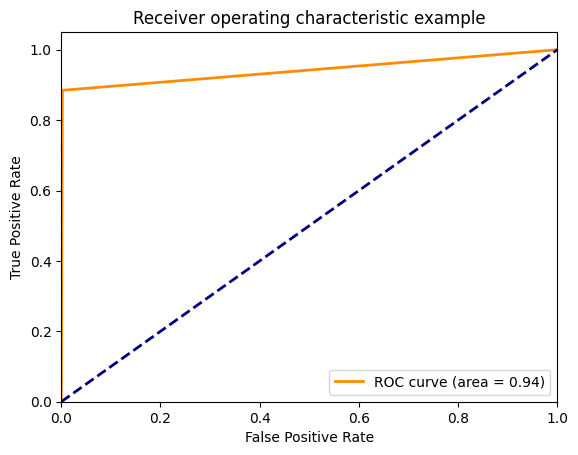

In [316]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

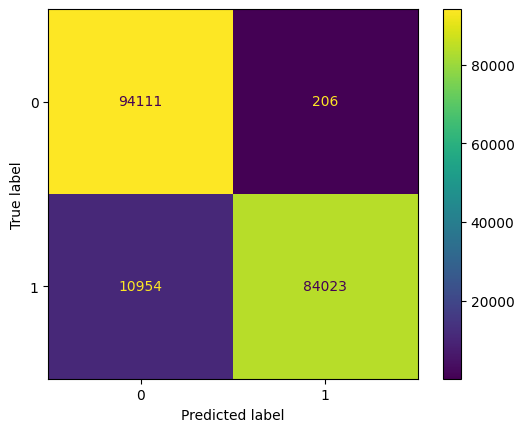

In [317]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels = rf.classes_)
ConfusionMatrixDisplay(cm).plot()